# __Proyecto de segmentación de países por datos socio-económicos__

## Importar librerías

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

## Carga de datos

In [63]:
df_country = pd.read_csv('Country-data.csv')
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [64]:
df_country.shape

(167, 10)

> El dataset está constituido por 10 columnas y 167 filas

## Conociendo los datos

La organización HELP International es una ONG humanitaria internacional comprometida a combatir la pobreza y proporcionar a la población de los países atrasados ​​servicios básicos y socorro en tiempos de desastres y calamidades naturales.

HELP International ha logrado recaudar alrededor de 10 millones de dólares. Ahora, el director ejecutivo de la ONG debe decidir cómo utilizar este dinero de forma estratégica y eficaz. Por lo tanto, debe elegir los países que más necesitan ayuda. Por lo tanto, su trabajo como científico de datos consiste en categorizar los países utilizando factores socioeconómicos y sanitarios que determinan su desarrollo general. A continuación, debe sugerir los países en los que el director ejecutivo debe centrarse más.

El dataset con el que se cuenta tiene la siguiente información:

- _country_: país.

- _child_mort_: Muerte de niños menores de 5 años por cada 1000 nacidos vivos.

- _exports_: Exportaciones de bienes y servicios per cápita. Expresadas como porcentaje del PIB per cápita.

- _health_: Gasto total en salud per cápita. Expresado como porcentaje del PIB per cápita.

- _imports_: Importaciones de bienes y servicios per cápita. Expresadas como porcentaje del PIB per cápita.

- _income_: Ingreso neto por persona.

- _inflation_: La medición de la tasa de crecimiento anual del PIB total.

- _life_expec_: El número promedio de años que viviría un recién nacido si los patrones de mortalidad actuales se mantuvieran

- _total_fer_: El número de hijos que tendría cada mujer si las tasas actuales de fertilidad por edad se mantuvieran iguales.

- _gdpp_: El PIB per cápita. Se calcula dividiendo el PIB total entre la población total.

## Manejando valores nulos

In [65]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


> Todas las variables estan en formato numérico excepto _country_.

> Todas las variables poseen 167 valores lo que indica que no hay valores nulos.

In [66]:
# Verificar cuantas variables presentan valores nulos
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

> Se evidencia que todas las variables están libres de valores nulos.

## Validando duplicados

In [67]:
# eleccionamos todos los registros duplicados
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


> No se presentan registros duplicados en el dataset

## Análisis de distribución

Analicémos la distribución de los datos para detectar outliers estadísticos. Vamos a seleccionar todas las variables que no sean de tipo object.

In [68]:
int_cols = df_country.select_dtypes(exclude='object').columns
int_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Graficamos la distribución de cada variable mediante un boxplot.

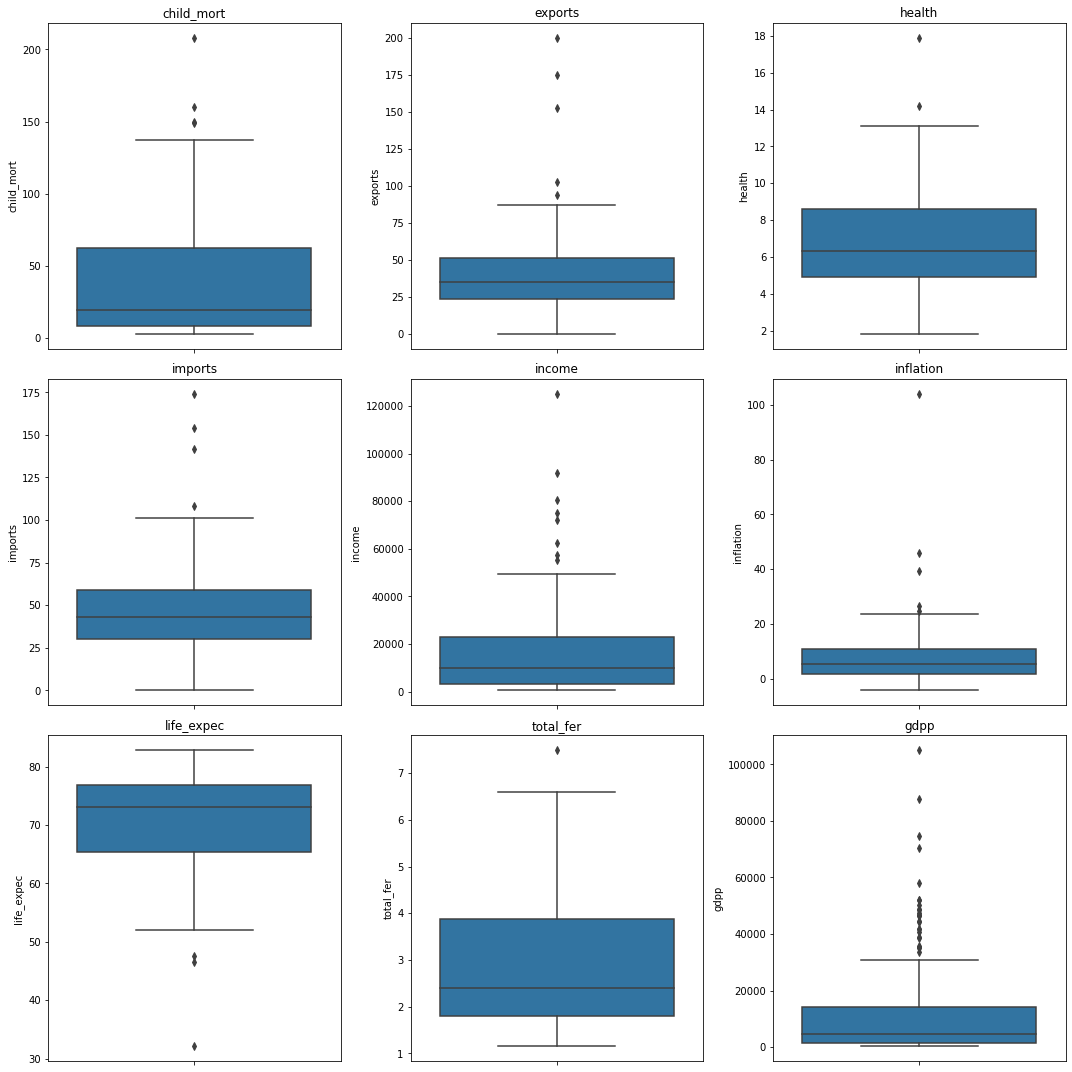

In [69]:
num_plots = len(int_cols)

# Número de filas deseadas para la grilla
rows = 3  
# Número de columnas deseadas para la grilla
cols = num_plots // rows + (num_plots % rows > 0)  

# Ajusta el tamaño de la figura según tus necesidades
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))  

for i, col in enumerate(int_cols):
    # Obtén el eje correspondiente
    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]  
    sns.boxplot(data=df_country, y=col, ax=ax)
    # Opcional: establece el título de cada gráfico
    ax.set_title(col)  

# Ajusta el espaciado entre los gráficos
plt.tight_layout()  
plt.show()


> Hay paises con tasas de mortalidad infantil muy altas comparadas con la mayoría.

> En export se muestran outliers por encima del 100% lo que sugiere que algunos paises exportan más de lo que producen.

> En imports vemos que algunos paises tienen importaciones muy altas, fuera de la distribución normal.

> La distribución de income está sesgada a la derecha. Hay paises con ingresos muy altos representados como outliers positivos.

> La mayoría de los paises tienen inflación por debajo del 20%. Pero tambien, hay unos tantos paises con hiperinflación (mayor al 60%).

> Hay un país con una taza de fertifilidad muy alta con mas de 6 hijos por mujer.

> La distribución de PIB es similar a la de income con algunos paises con un PIB per capita extremadamente alto.

> La presencia de muchos outliers en las variables indica la desigualdad entre paises. No se requiere eliminarlos debido a que hacen parte de la información de los datos, no son datos salidos de la nada estadísticamente hablando. Representan una realidad.


Creamos una heatmap para visualizar la correlación entre las variables numéricas.

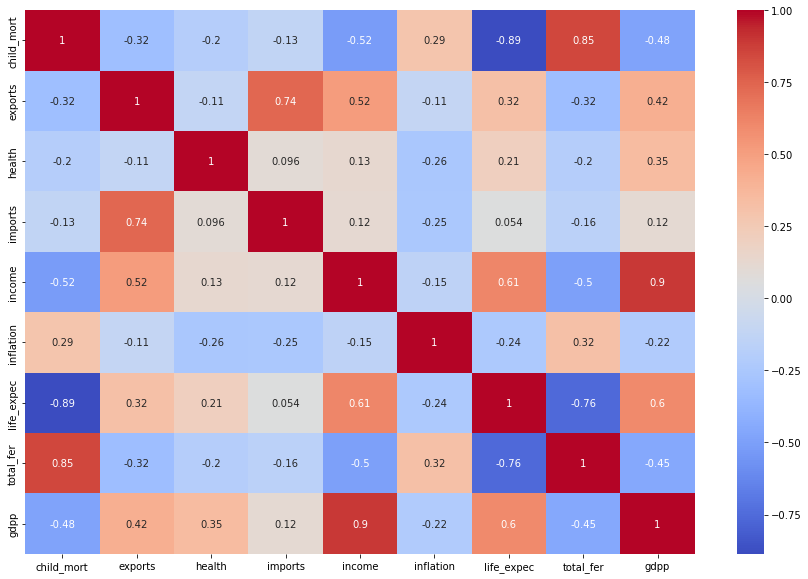

In [70]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_country.corr(), annot=True, cmap='coolwarm')
plt.show()

> El income y gdpp están altamente correlacionado de manera positiva. Esto indica que los ingresos de un país está directamente relacionado con su PIB.

> La taza de mortalidad infantil esta altamente correlacionado con la esperanza de vida de manera negativa. Un aumento en la mortalidad infantil reduce la esperanza de vida.

> La tasa de mortalidad infantil tambien está altamente correlacionada con el taza de fertilidad de manera negativa. Un aumento en la mortalidad infantil se refleja en una reducción de la tasa de fertilidad.

> Las exportaciones tiene alta correlación positiva con las importaciones.

> Las exportaciones tambien se correlacionan en gran medida con los ingresos del país.

> La esperanza de vida presenta una correlación alta con el PIB del país.

> La esperanza de vida esta relacionada negativamente con la taza de fertilidad.

> Todas las variables son importantes debido a sus relaciones, por tanto, no se omite ninguna.

## Escalar datos

Procedemos a llevar todos los datos a una misma escala con el fin de que al aplicar los algoritmos de clusterización, las distancias sean interpretadas correctamente y no le de un mayor peso a ciertos datos.

In [71]:
# importamos objeto para escalar los datos con la desviacion estandar
from sklearn.preprocessing import StandardScaler

# instanciamos el objeto
scaler = StandardScaler()

# Elimina 'country' porque es categorica y no se puede escalar
# ajusta el escalador a los datos y los escala
df_country_scaled = scaler.fit_transform(df_country.drop('country', axis=1))

df_country_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

Volvemos un dataframe los datos escalados nuevamente

In [72]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns=df_country.drop('country', axis=1).columns)
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## PCA

Es una técnica de reducción de dimensionalidad que se usa **antes del clustering** para simplificar los datos y hacer más eficiente y visual el análisis.

Transforma un conjunto de variables posiblemente correlacionadas en un nuevo conjunto de variables **no correlacionadas** llamadas **componentes principales**. Estas componentes capturan la **máxima varianza posible** de los datos en menos dimensiones.

In [73]:
# importamos el objeto PCA
from sklearn.decomposition import PCA

In [74]:
# instanciamos el objeto
# al no especificar el numero de componentes, se calcula uno por cada variable
pca = PCA()

# ajustamos los datos a pca
pca.fit(df_country_scaled)

# transforma los datos al nuevo espacio de componentes principales
pca_data_scaled = pca.transform(df_country_scaled)

pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

Obtenemos el PCA de cada variable original. Ahora vamos a calcular el radio de varianza

In [75]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


> Arroja la varianza por cantidad de componentes

> Para trabajar con n componentes principales se requiere obtener la suma acumulada hasta el índice n.

Vamos a graficar la suma acumulada del radio de varianza para cada componente. De esta forma, podremos estimar el número de componentes principales adecuado que capture la mayor cantidad de varianza de los datos.

Text(0, 0.5, '% Variance')

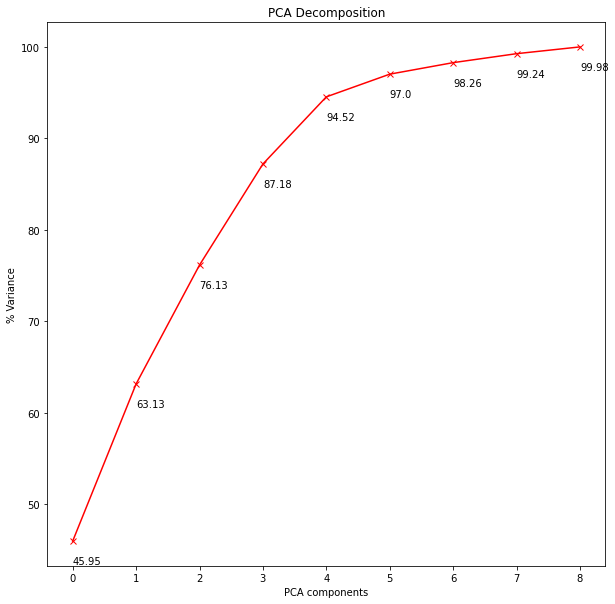

In [76]:
# Calculo de la suma acumulada por componente en porcentaje
cum_var = np.cumsum(np.round(var, decimals=4)*100)

# numero total de componentes
components = list(range(0,9))

# grafico
plt.figure(figsize=(10,10))
for s,d in zip(components,cum_var):
    plt.annotate(np.round(d,decimals=2), xy=(s,d-2.5))

plt.plot(components,cum_var, 'r-x')
plt.title("PCA Decomposition")
plt.xlabel('PCA components')
plt.ylabel('% Variance')

> La grafica muestra que 4 componentes principales abarca casi el 90% de la varianza de los datos. Con 5, se alcanza el 95%

> Como el objetivo es reducir la dimnensionalidad, nos quedamos con 4 componentes principales

In [77]:
# convertimos el dataframe los datos con pca aplicado
pca_data_standard = pd.DataFrame(pca_data_scaled)

# seleccioonamos la 5 primeras componentes principales
pca_data_standard.drop([4,5,6,7,8], axis=1, inplace=True)

pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


> Todas las variables se resumen a las 4 componentes principales seleccionadas ya que estas conservan gran parte de la varianza de los datos.

> Perdemos una parte de la información pero para el clustering es mejor tener poca dimensionalidad para encontrar la distancia entre los clusteres.

## Importar librerías para clustering

In [78]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## __Resolviendo con K-means__

Vamos a aplicar este modelo sobre los datos tratados con PCA y sin ser tratados para ver cual arroja mejores resultados.

### PCA

Aplicamos el modelo k-means sobre los datos a lo que se aplicó PCA.

In [79]:
# suma de los cuadrados de la distancias
sum_of_squared_distances = []
# lista para almacenar los indices de silueta
silhouette_scores = []
# rango de K
K = range(2,15)

# iteramos el modelo sobre cada K
for _ in K:
    km = KMeans(n_clusters=_, n_init=10)
    y_pred = km.fit_predict(pca_data_standard)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard, y_pred)) 


Generamos gráficos de K en función de la inercia y en función del índice de silueta para encontrar el número óptimo de clusteres.

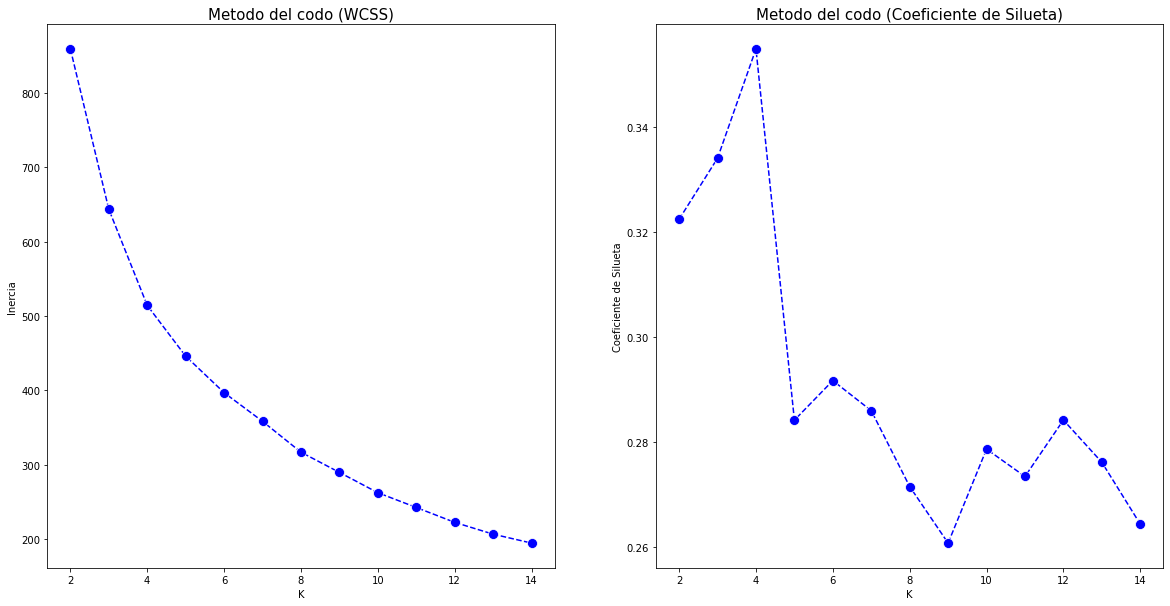

In [80]:
data = [
    (sum_of_squared_distances, 'Metodo del codo (WCSS)'),
    (silhouette_scores, 'Metodo del codo (Coeficiente de Silueta)')
]

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

for i, (values, title) in enumerate(data):
    sns.lineplot(ax=axes[i], x=K, y=values, linestyle='dashed', marker='o', markersize=10, color='b')
    axes[i].set_xlabel('K')
    axes[i].set_ylabel('Inercia' if i == 0 else 'Coeficiente de Silueta')
    axes[i].set_title(title, size=15)

> El número óptimo de K ronda entre 4 y 5.

> La gráfica del coeficiente de silueta muestra que efectivamente K = 4 es el número óptimo de clusteres.

Una ves definido el valor de K, procedemos a usar KMeans con el valor de K óptimo sobre los datos y obtener el clustering de cada país para guardarlo en el dataframe _df_country_.

In [81]:
km = KMeans(n_clusters=4, n_init=10)
y = km.fit_predict(pca_data_standard)

# imprimimos el indice de silueta general 
print(silhouette_score(pca_data_standard, y))

# agregamos al dataframe una columna para almacenar la clasificacion que realiza el modelo
df_country['k_means_pca'] = y

0.34930392685434886


### Sin PCA

Vamos a utilizar los datos sin PCA para entrenar el modelo kmeans y agrupar los datos

In [82]:
# suma de los cuadrados de la distancias
sum_of_squared_distances2 = []
# lista para almacenar los indices de silueta
silhouette_scores2 = []
# rango de K
K = range(2,15)

# iteramos el modelo sobre cada K
for _ in K:
    km = KMeans(n_clusters=_, n_init=10)
    y_pred = km.fit_predict(df_country_scaled)
    sum_of_squared_distances2.append(km.inertia_)
    silhouette_scores2.append(silhouette_score(df_country_scaled, y_pred)) 


Obtenemos las gráficas como en el paso anterior para encontrar el K óptimo.

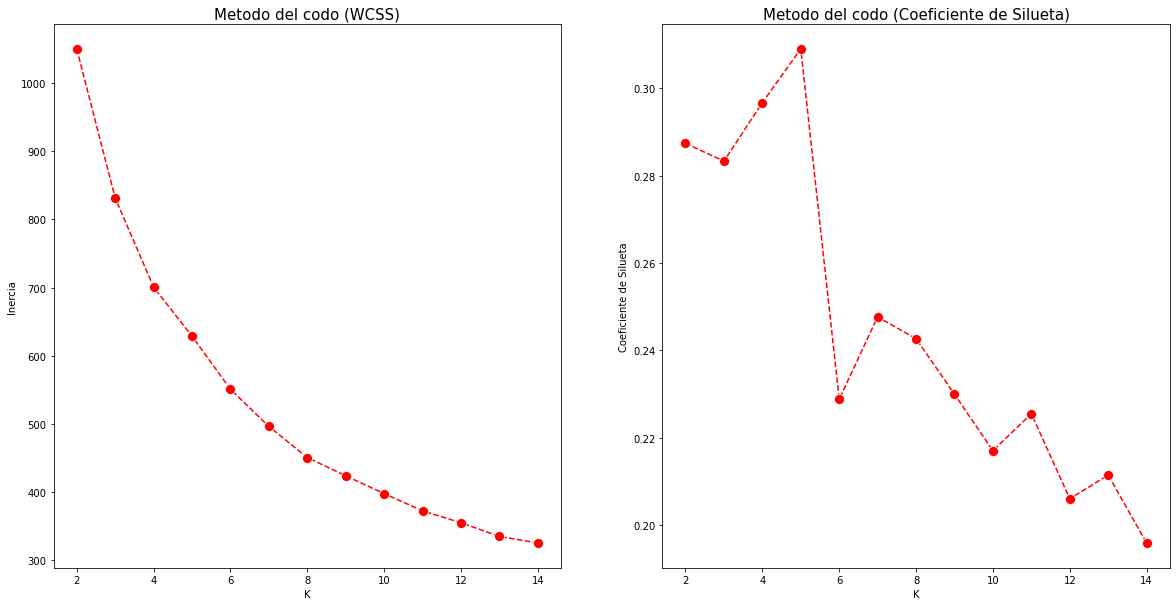

In [83]:
data = [
    (sum_of_squared_distances2, 'Metodo del codo (WCSS)'),
    (silhouette_scores2, 'Metodo del codo (Coeficiente de Silueta)')
]

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

for i, (values, title) in enumerate(data):
    sns.lineplot(ax=axes[i], x=K, y=values, linestyle='dashed', marker='o', markersize=10, color='r')
    axes[i].set_xlabel('K')
    axes[i].set_ylabel('Inercia' if i == 0 else 'Coeficiente de Silueta')
    axes[i].set_title(title, size=15)

> Podemos notar que en la primera gráfica, el valor óptimo de K ronda entre 4 y 5.

> La segunda gráfica muestra que el K óptimo es de 5.

Ahora, procedemos a utilizar KMeans con el K óptimo sobre los datos para encontrar el índice de silueta general y guardamos la clasificacion de los datos que hace el algoritmo en el dataframe _df_country_

In [84]:
km = KMeans(n_clusters=5, n_init=10)
y = km.fit_predict(df_country_scaled)

# imprimimos el indice de silueta general 
print(silhouette_score(df_country_scaled, y))

# agregamos al dataframe una columna para almacenar la clasificacion que realiza el modelo
df_country['k_means'] = y

0.3060544006436598


> El coeficiente de silueta mide cuán similar es cada punto a su propio cluster en comparación con otros clusters cercanos. Un valor de coeficiente de silueta más alto indica una mejor separación entre los clusters.

> Al comparar los indices de silueta general de ambos métodos, vemos que con PCA el índice es mayor. Esto indica que el modelo en el primer caso arroja mejores resultados al utilizar PCA.

> Es posible que obtengas un valor alto de coeficiente de silueta incluso si el número de clusters no es el óptimo. Esto puede suceder si los datos tienen estructuras complejas o superpuestas que hacen que los puntos se agrupen de manera razonable incluso con un número incorrecto de clusters.

## __Resolviendo con Agglomerativen Hierarchical Clustering__

Vamos a utilizar el modelo de aglomeracion jerarquica para agrupar los paises de acuerdo a sus caracteristicas.

### PCA

Vamos a crear el dendograma con los datos a los que se aplico PCA.

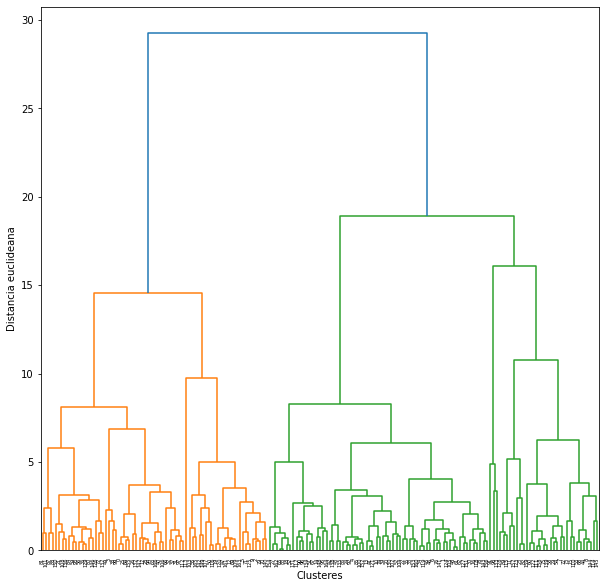

In [85]:
fig = plt.figure(figsize=(10,10))
dendogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.xlabel('Clusteres')
plt.ylabel('Distancia euclideana')
plt.show()

> El dendograma nos muestra claramente que hay dos clusteres bastante separados. Seguido hay 3 clusteres que logran diferenciarse bien. Vamos a utilizar estos dos valores en lo que sigue para averiguar cual es mejor.

In [86]:
# para 2 clusteres
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_hc))
df_country['hc_pca'] = y_hc

0.3070110704080526


In [87]:
# para 3 clusteres
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_hc))
df_country['hc_pca'] = y_hc

0.2700517226575087


> Vemos que el indice de silueta es menor para 3 clusteres. nos quedamos con 2 clusteres ya que arroja los mejores resultados.

> Guardamos la agrupacion de los datos con mayor indice de silueta.

In [88]:
# para 2 clusteres
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_hc))
df_country['hc_pca'] = y_hc

0.3070110704080526


### Sin PCA

Creamos el dendograma con los datos sin PCA.

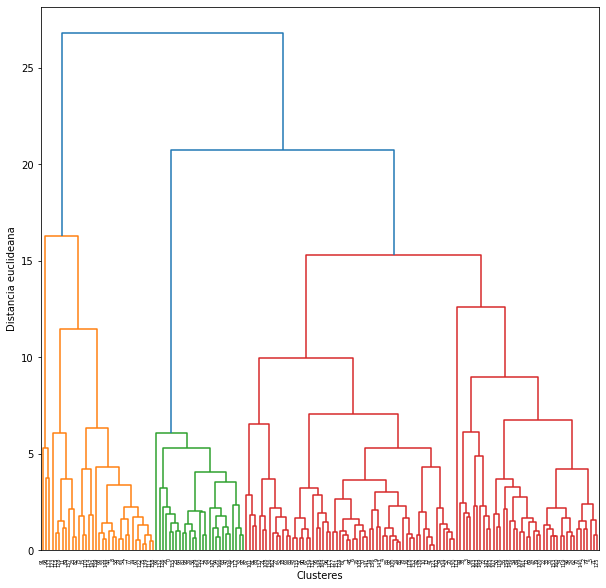

In [89]:
fig = plt.figure(figsize=(10,10))
dendogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))
plt.xlabel('Clusteres')
plt.ylabel('Distancia euclideana')
plt.show()

> La grafica muestra que 2 clusteres estan bien separados.

> 3 clusteres se muestran bien diferenciados.

> Hasta 4 clusteres se logra evidenciar. Sin embargo, hay dos que estan muy cercanos.

> Nos quedamos con 2 y 3 clusteres para probar cual es mejor

In [90]:
# 2 clusteres
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_hc))
df_country['hc'] = y_hc

0.3153134331018189


In [91]:
# 3 clusteres
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_hc))
df_country['hc'] = y_hc

0.24563001303300652


> Para 2 clusteres el indice de silueta es mayor. Esto es gracias a que se logra diferenciar muy bien ambos grupos, mientras que para 3 grupos la diferencia no es tan marcada.

> Guardamos la clasificacion con mayor indice de silueta

In [92]:
# 2 clusteres
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_hc))
df_country['hc'] = y_hc

0.3153134331018189


## __Resolviendo con DBSCAN__

Vamos a aplicar el modelo DBSCAN sobre el set datos con PCA y sin PCA.

### PCA

In [93]:
from sklearn.neighbors import NearestNeighbors

# calculo del vecino mas cercano
neighbors = NearestNeighbors(n_neighbors=2)
# ajuste del objeto a los datos
neighbors_fit = neighbors.fit(pca_data_standard)
# guardamos la distancia e indice de cada punto
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

In [94]:
# ordenamos las distancias
distances = np.sort(distances, axis=0)
# tomar la distancia del vecino mas cercano de cada dato
distances = distances[:,1]

Graficamos las distancias mas cercanas de cada punto para obtener el rango de epsilon optimo.

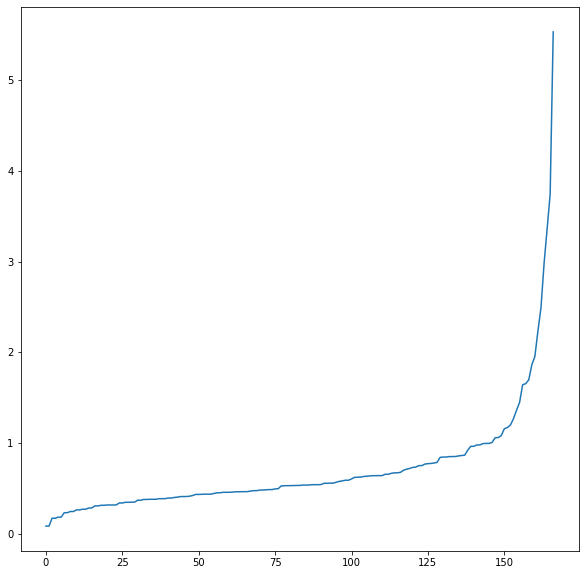

In [95]:
fig = plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

> El grafico muestra que la rodilla e encuentra entre 0.5 y 2.

> Procedemos a probar valores de epsilon dentro de ese rango.

Ahora configuramos el DBSCAN con el rango de epilon optimo y el rango de vecinos mas cercanos 

In [96]:
# rango de epsilon
eps_values = np.arange(0.5, 2, 0.10)

# rango de vecinos mas cercanos
# se elige como minimo la cantidad de componentes basicos de PCA
min_samples = np.arange(3, 12)

In [97]:
from itertools import product

# combinatoria de ambos parametros
dbscan_params = list(product(eps_values, min_samples))

# lista para almacenar el numero de cluster
n_clusters = []

# lista para guardar en indice de silueta
sil_score = []

# iteramos el modelo para cada combinacion de parametros
for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard, y_dbscan))
       
    except:
        sil_score.append(0)
    n_clusters.append(len(np.unique(y_dbscan)))

Convertimos los valores en su forma matricial

In [98]:
df_param_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps', 'Min_Samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = n_clusters

In [99]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_Samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_Samples')

Graficamos un mapa de calor para el indice de silueta y el numero de clusteres en funcion de las combinaciones de los parametros.

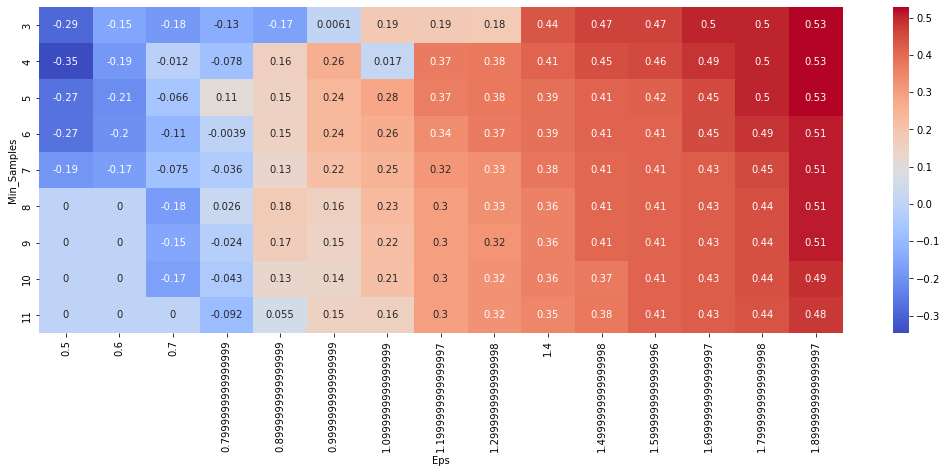

In [100]:
# Heatmap del indice de silueta
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

> Tenemos indices de silueta altos para numeros de ejemplos de 3 y 4.

> Para tales valores se tiene un Eps de 1.9.

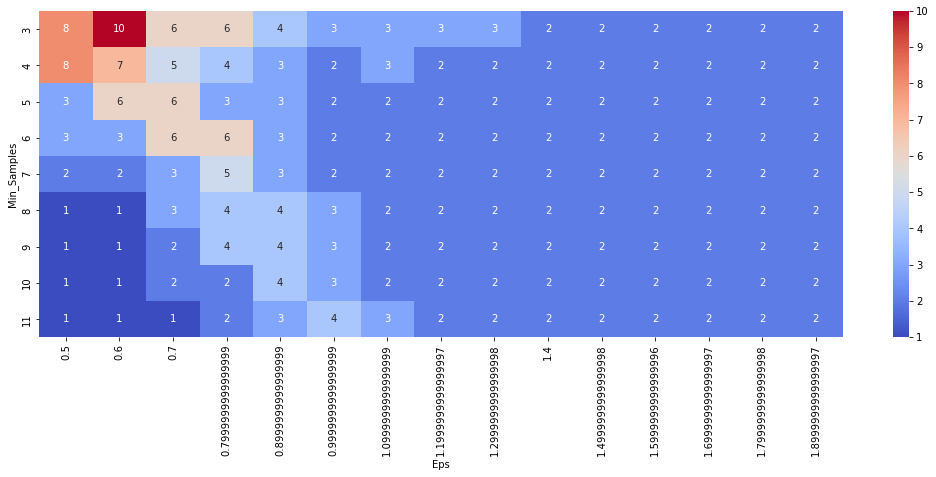

In [101]:
# heatmap de numero de clusteres
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

> Comparando con el heatmap anterior, notamos que en la misma posicion donde arroja indice de silueta altos tenemos numero de clusteres bajos. Esto indica que no es una buena eleccion.

> Debemos buscar valores de silueta y de clusteres equilibrados que arrojen los mejores resultados.

> Al analizar la grafica, podemos quedarnos con un numero de clusteres de 3 el cual arroja un indice de silueta de 0.19. Tales valores corresponden a los siguientes parametros: Eps de 1.09 y Min sample de 3.

En lo que sigue, vamos a entrenar el modelo DBSCAN con los parametros encontrados para contrastar el resultado que se obtenga con los valores elegidos en los heatmaps.

In [102]:
dbscan_train = DBSCAN(eps=1.09, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_dbscan))
df_country['dbscan_pca'] = y_dbscan

0.186189124428695


> El indice de silueta obtenido, al redondearse pasa a 0.19, corresponde al valor encontrado en el heatmap.

### Sin PCA

Se implementa de la misma forma que el proceso anterior pero sobre los datos sin PCA, es decir, sobre _df_country_scaled_.

In [103]:
# calculo del vecino mas cercano
neighbors = NearestNeighbors(n_neighbors=2)
# ajuste del objeto a los datos
neighbors_fit = neighbors.fit(df_country_scaled)
# guardamos la distancia e indice de cada punto
distances, indices = neighbors_fit.kneighbors(df_country_scaled)

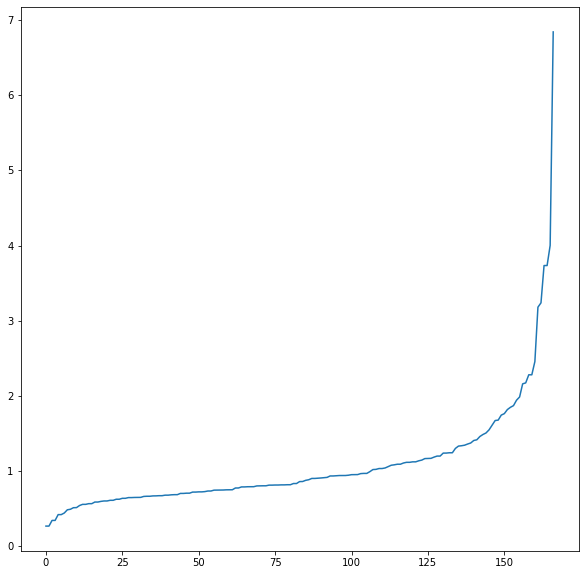

In [104]:
# ordenamos las distancias
distances = np.sort(distances, axis=0)
# tomar la distancia del vecino mas cercano de cada dato
distances = distances[:,1]

fig = plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

> El grafico muestra que la rodilla se encuentra entre 1 y 3.

> Procedemos a probar valores de epsilon dentro de ese rango.

In [105]:
# rango de epsilon
eps_values = np.arange(1, 3, 0.10)

# rango de vecinos mas cercanos
# se elige como minimo la cantidad de componentes basicos de PCA
min_samples = np.arange(3, 12)

In [106]:
from itertools import product

# combinatoria de ambos parametros
dbscan_params = list(product(eps_values, min_samples))

# lista para almacenar el numero de cluster
n_clusters = []

# lista para guardar en indice de silueta
sil_score = []

# iteramos el modelo para cada combinacion de parametros
for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaled)
    try:
        sil_score.append(silhouette_score(df_country_scaled, y_dbscan))
       
    except:
        sil_score.append(0)
    n_clusters.append(len(np.unique(y_dbscan)))

In [107]:
df_param_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps', 'Min_Samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = n_clusters

pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_Samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_Samples')

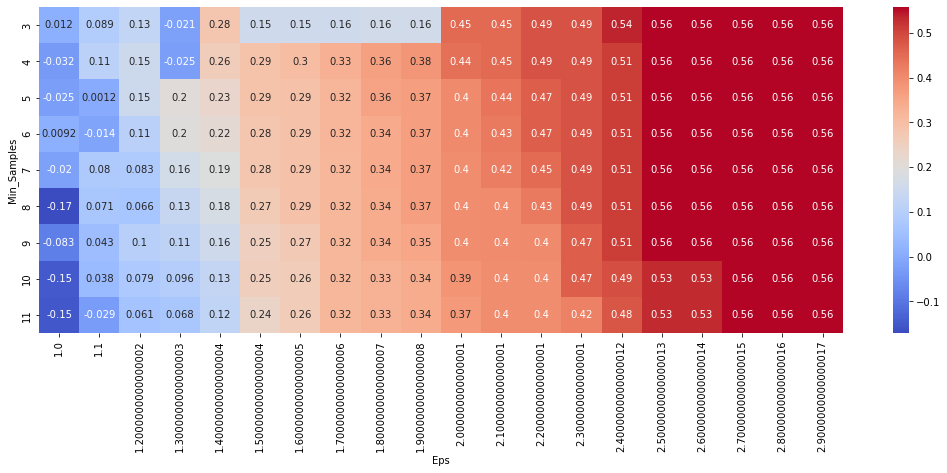

In [108]:
# Heatmap del indice de silueta
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

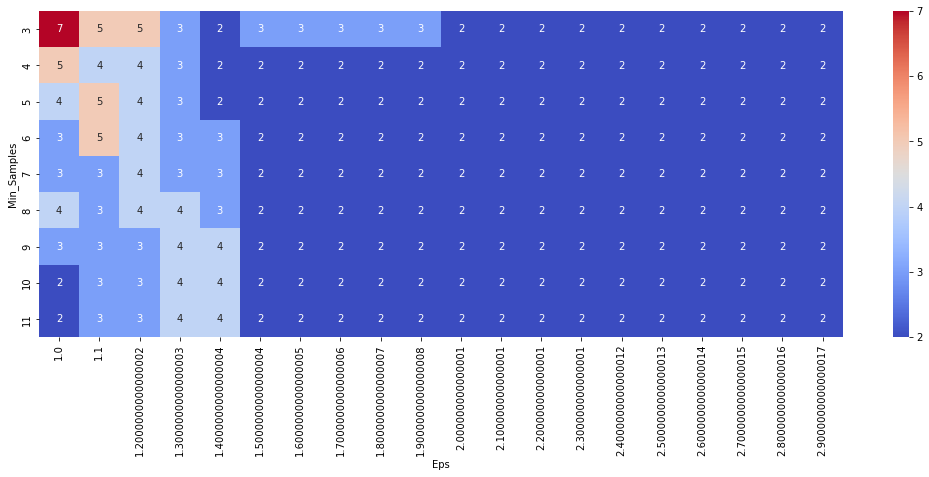

In [109]:
# heatmap de numero de clusteres
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [110]:
dbscan_train = DBSCAN(eps=1.4, min_samples=6)
y_dbscan = dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_dbscan))
df_country['dbscan_cluster'] = y_dbscan

0.21539651251091044


> El indice de silueta sin PCA es mayor que con PCA.

Ahora contamos con la clasificacion de los paises en clusteres predicho por los diferentes modelos. En lo que sigue, eligiremos el que mejor clusterizacion arroja

In [111]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,0,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2,0,0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2,1,0,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,0,1,0,-1,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,2,0,0,0,1


## Evaluación de resultados

Recordando la implementacion de cada modelo, sabemos que obtuvimos un mejor indice de silueta con el modelo k-means con pca por lo que este sera el que vamos analizar. 

In [112]:
# mostrar el nombre de cada columna
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan_cluster'],
      dtype='object')

In [113]:
# seleccion de variables de interes
df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


Realizamos diagramas de dispersion de todas la variables con todas y distingue los grupos de acuerdo al agrupamiento dado por _k_means_pca_

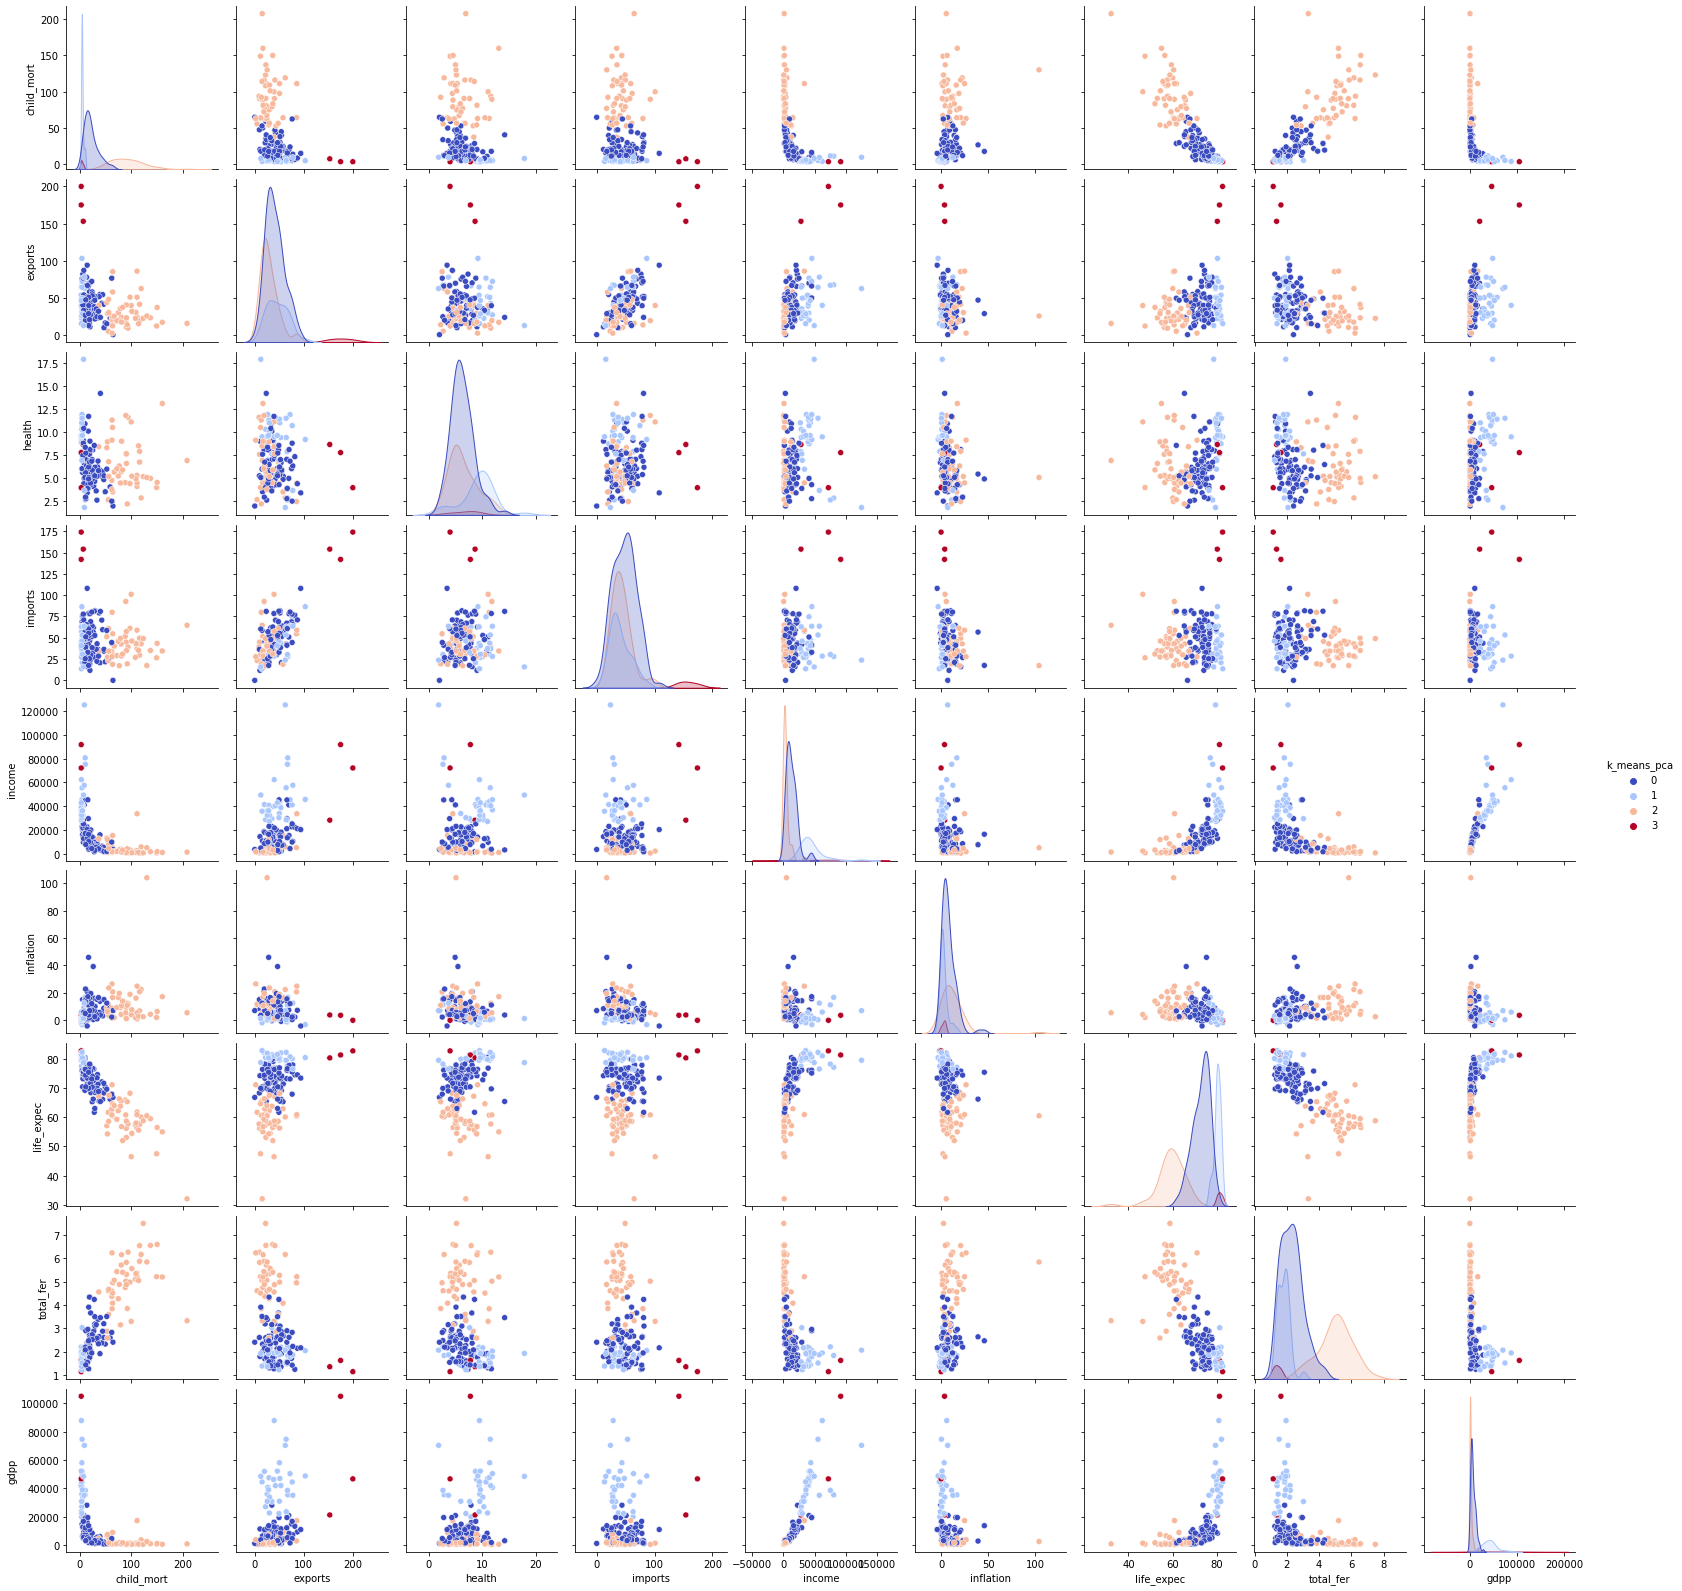

In [114]:
sns.pairplot(data=df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']], hue='k_means_pca', palette='coolwarm')

> Visualmente notamos que los clusteres son diferenciables en gran parte de las graficas.

> Este modelo predice 3 clusteres y los graficos muestran que los grupos se ajustan bien a los datos.

> Vamos a ampliar la grafica del indice de mortalidad infantil vs gdpp

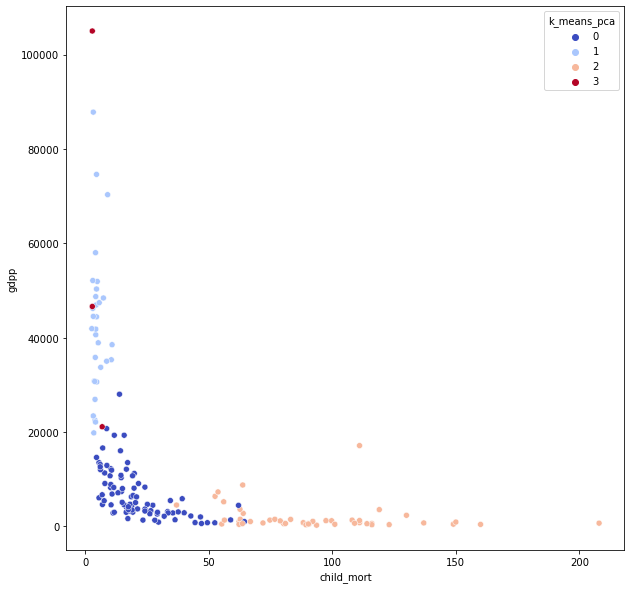

In [115]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_country, x='child_mort', y='gdpp', hue='k_means_pca', palette='coolwarm')
plt.show()

> El grafico nos indica que hay paises con un alto gdpp y baja tasa de mortalidad infantil.

> Tambien hay paises con bajo gdpp y un alta tasa de mortalidad infantil.

> Se presentan ciertos paises como outliers

Seleccionemos los paises de los diferentes grupos.

In [116]:
# alto dgpp y bajo child_mort. cluster 0.
df_country[df_country['k_means_pca']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2,0,0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2,1,0,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,2,0,0,0,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0,2,1,0,0,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0,2,0,0,0,1
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0,2,1,0,0,1
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,2,0,0,0,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,2,1,0,-1,-1


In [117]:
# medio bajo dgpp y bajo medio child_mort. cluster 3.
df_country[df_country['k_means_pca']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3,1,0,1,-1,-1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3,1,0,1,-1,-1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3,1,0,1,-1,-1


In [118]:
# bajo dgpp y alto child_mort. cluster 1.
df_country[df_country['k_means_pca']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1,3,0,1,0,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1,3,0,1,0,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1,3,0,1,0,-1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1,3,0,1,-1,-1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1,3,0,1,0,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1,3,0,0,0,1
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,1,2,0,0,0,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1,3,0,1,0,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1,3,0,1,0,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1,3,0,1,0,1


In [119]:
# outlier
df_country[df_country['k_means_pca']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2,0,1,0,0,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2,0,1,0,-1,-1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2,0,1,0,0,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,2,2,1,0,0,-1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2,0,1,0,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2,0,1,0,0,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2,0,1,0,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2,0,1,0,0,-1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2,0,1,0,0,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2,0,1,0,0,0


In [120]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar datos geoespaciales del mundo y fusionarlos con el df
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Clasificacion = pd.DataFrame({'country':df_country.country,
                             'k_means_pca':df_country.k_means_pca})

world = world.merge(Clasificacion, how='left', left_on='name', right_on='country')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(20, 7))

world.plot(ax=ax, column='k_means_pca', legend=True, cmap='coolwarm')

plt.title('Mapa de Clasificación de Países según K-Means PCA')

plt.show()



ModuleNotFoundError: No module named 'geopandas'